# Import Dependencies

In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
pd.set_option("display.max_rows",500)
import numpy as np
import os

# Read in Dataset

In [2]:
df = pd.read_csv("DataSource/data_w_genres.csv")
df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


# Check for Missing Rows

- no missing rows

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [4]:
df.isna().any().any()

False

# Data Cleaning on Genre Column

In [5]:
various_genres = df.genres.unique()
print(various_genres)

["['show tunes']" '[]'
 "['antiviral pop', 'comedy rock', 'comic', 'parody']" ...
 "['classic cantopop']"
 "['c-pop', 'classic mandopop', 'mainland chinese pop', 'mandopop']"
 "['chinese indie', 'chinese indie rock']"]


In [6]:
genres_df = df
# makes it into actual list instead of string list
genres_df['genres'] = genres_df['genres'].apply(lambda x: x[1:-1].split(', '))
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [7]:
genres_df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


# Filter empty values from each list

In [8]:
for i in genres_df.index:

    genres_df['genres'].loc[i] = list(filter(None, genres_df['genres'][i]))

/home/bdr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

### Create Multiple Rows for Tracks with More Than 1 Genre

- pandas explode
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html
- this will create rows with NaN's
- __info()__ output confirms number of rows in the dataset increased dfrom 27621 to 73622

In [10]:
new_df = genres_df.explode('genres').reset_index(drop=True)
new_df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,'show tunes'
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,NaN
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,NaN
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,NaN
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,NaN


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73622 entries, 0 to 73621
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           73622 non-null  object 
 1   acousticness      73622 non-null  float64
 2   danceability      73622 non-null  float64
 3   duration_ms       73622 non-null  float64
 4   energy            73622 non-null  float64
 5   instrumentalness  73622 non-null  float64
 6   liveness          73622 non-null  float64
 7   loudness          73622 non-null  float64
 8   speechiness       73622 non-null  float64
 9   tempo             73622 non-null  float64
 10  valence           73622 non-null  float64
 11  popularity        73622 non-null  float64
 12  key               73622 non-null  int64  
 13  mode              73622 non-null  int64  
 14  count             73622 non-null  int64  
 15  genres            64092 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

### Drop NaN Rows

In [12]:
new_df=new_df.dropna().reset_index(drop=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           64092 non-null  object 
 1   acousticness      64092 non-null  float64
 2   danceability      64092 non-null  float64
 3   duration_ms       64092 non-null  float64
 4   energy            64092 non-null  float64
 5   instrumentalness  64092 non-null  float64
 6   liveness          64092 non-null  float64
 7   loudness          64092 non-null  float64
 8   speechiness       64092 non-null  float64
 9   tempo             64092 non-null  float64
 10  valence           64092 non-null  float64
 11  popularity        64092 non-null  float64
 12  key               64092 non-null  int64  
 13  mode              64092 non-null  int64  
 14  count             64092 non-null  int64  
 15  genres            64092 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

### Identify Distribution of Genres

In [13]:
genres_num = new_df['genres'].value_counts()
genres_num

'pop'                               638
'rock'                              612
'dance pop'                         570
'rap'                               521
'hip hop'                           514
                                   ... 
'marimba orquesta'                    1
'german show tunes'                   1
'instrumental progressive metal'      1
'cincinnati indie'                    1
'belgian indie rock'                  1
Name: genres, Length: 2663, dtype: int64

### List of Genres the Model will Predict

- all genres will be map to these 12

In [14]:
genre_list =["pop","rock","rap","indie","country","latin","electronic","r&b","classical","show tunes","jazz","worship"]

### Dictionary of Other Genres that Map to List

In [15]:
genre_dict = {
    'dance':'pop',
    'hop':'rap',
    'folk':'indie',
    'urban': 'rap',
    'trap':'rap',
    'mellow':'indie',
    'funk':'pop',
    'alternative':'rock',
    'grupera':'latin',
    'storm':'r&b',
    'soul':'r&b',
    'grunge':'rock',
    'tropical':'electronic',
    'edm':'electronic',
    'motown':'r&b',
    'banda':'latin',
    'stomp':'indie',
    'punk':'rock',
    'norteno':'latin',
    'metal':'rock',
    'disco':'rock',
    'mexican':'latin',
    'wave':'pop',
    'swing':'jazz',
    'lounge':'jazz',
    'house':'electronic',
    'hollywood':'show tunes',
    'broadway':'show tunes',
    'reggae':'r&b',
    'hardcore':'rock',
    'boy':'pop',
    'lo-fi':'electronic',
    'ballroom':'classical',
    'dub':'electronic',
    'salsa':'latin',
    'tango':'latin',
    'ska':'rock',
    'screamo':'rock',
    'trance':'electronic',
    'cumbia':'latin',
    'emo':'rock',
    'doom':'rock',
    'orchestra':'classical',
    'movie':'show tunes',
    'americana':'indie',
    'blue':'jazz',
    'redneck':'country',
    'ranchera':'latin',
    'choral':'classical',
    'soundtrack':'show tunes',
    'techno':'electronic',
    'gospel':'worship',
    'christian':'worship',
    'drone':'rock',
    'bass':'electronic',
    'age':'indie',
    'bollywood':'show tunes',
    'electro':'electronic',
    'girl':'pop',
    'rave':'electronic',
    'thrash':'rock',
    'cello':'classical',
    'bachata':'latin',
    'bossa nova':'jazz',
    'disney':'show tunes',
    'bop':'jazz',
    'gaze':'rock',
    'romantic':'classical',
    'opera':'classical',
    'songwriter':'indie',
    'duranguense':'latin',
    'samba':'latin',
    'bolero':'latin',
    'standards':'pop',
    'easy':'pop',
    'big':'jazz',
    'focus':'classical',
    'core':'rock',
    'step':'electronic',
    'comic':'show tunes',
    'ccm':'worship',
    'stride':'jazz',
    'choir':'classical',
    'string':'classical',
    'lilith':'indie',
    'filmi':'show tunes',
    'ambient':'classical',
    'melancholia':'classical',
    'doo-wop':'jazz',
    'tejano':'latin',
    'instrumental':'classical',
    'background':'classical',
    'jam':'jazz',
    'baroque':'classical',
    'banjo':'country',
    'dirt':'country',
    'sleep':'classical',
    'mpb':'latin',
    'beat':'electronic'
}

### Create New List with Target Genres

In [16]:
clean_genres = []
still_dirty = []

for index,row in new_df.iterrows():
    dirty_genre = row['genres'].strip("'").strip()
    clean = ""
#     print(dirty_genre)
    
    #First check: confirm if dirty genre is in the master list
    if dirty_genre in genre_list:
        clean = dirty_genre
        
        
    #Second check: confirm clean is NOT an empty string
    if((clean == "") & (dirty_genre in genre_dict.keys())):
        clean = genre_dict[dirty_genre]
    
    #Third check: if clean does NOT equal empty string
    #split on white space & repeat previous checks
    if clean == "":
        words = dirty_genre.split(" ")
        
        for word in words:
            if word in genre_list:
                clean = word
                break
            elif word in genre_dict.keys():
                clean = genre_dict[word]
                break
            else:
                pass
        
        #Reverse check (e.g. catches pop & europop)
        if clean == "":
            for thing in genre_list:
                for word in words:
                    if thing in word:
                        clean = thing
                        break
                    
            if clean == "":
#                 print(words)
#                 print(genre_dict.keys())
                for thing2 in genre_dict.keys():
                    for word in words:
                        if thing2 in word:
                            clean = genre_dict[thing2]
                            break
    
    
    if clean == "":
        still_dirty.append(dirty_genre)
        
        
    clean_genres.append(clean)
    

In [17]:
clean_genres

['show tunes',
 'pop',
 'rock',
 'show tunes',
 '',
 'rap',
 'rap',
 'rock',
 'rap',
 'rap',
 'rap',
 'rap',
 'rap',
 'show tunes',
 'show tunes',
 'show tunes',
 'show tunes',
 'show tunes',
 'show tunes',
 'rock',
 'pop',
 'classical',
 'pop',
 'pop',
 'latin',
 'pop',
 'r&b',
 'rap',
 'pop',
 'pop',
 'rock',
 'rock',
 'rock',
 'rock',
 'rap',
 'rap',
 'pop',
 'pop',
 'pop',
 'pop',
 'rock',
 'pop',
 'pop',
 'pop',
 'pop',
 'rock',
 'rock',
 'indie',
 'electronic',
 'rock',
 'rock',
 'rap',
 'rap',
 'rap',
 'rap',
 'rap',
 'rock',
 'indie',
 'rap',
 'electronic',
 'r&b',
 'r&b',
 'r&b',
 'r&b',
 'rock',
 'worship',
 'rock',
 'rock',
 'rap',
 'pop',
 'indie',
 'indie',
 'pop',
 'pop',
 'pop',
 '',
 'pop',
 'pop',
 'classical',
 'pop',
 'jazz',
 'rock',
 'rock',
 'rock',
 'pop',
 'pop',
 'indie',
 'rock',
 'indie',
 'rock',
 'rock',
 'rock',
 'rock',
 'rap',
 'pop',
 '',
 'rap',
 'rap',
 'pop',
 'pop',
 'rap',
 'pop',
 'jazz',
 'pop',
 'r&b',
 'rap',
 'rap',
 'rap',
 'rap',
 'pop',
 'p

### Percentage of Rows with No Genre Assigned

In [18]:
sum([x=="" for x in clean_genres])/64092

0.09923235349185545

### Number of Rows with Target Genre Assigned

In [19]:
64092*.90

57682.8

### Orphan Genres

In [20]:
pd.Series(still_dirty).value_counts()[0:100]

experimental                         97
escape room                          95
sufi                                 77
turntablism                          76
chanson                              75
corridos tumbados                    75
environmental                        63
velha guarda                         62
jawaiian                             59
old-time                             58
opm                                  58
downtempo                            57
classic opm                          57
perreo                               56
british invasion                     55
crunk                                55
healing                              51
gbvfi                                51
neo-psychedelic                      50
rebetiko                             49
corrido                              48
ragtime                              48
forro                                47
"children's music"                   46
hyphy                                46


# DataFrame with Target Genres

In [21]:
new_df["clean_genres"]=clean_genres
new_df2=new_df.loc[new_df.clean_genres !=""].reset_index(drop=True)
new_df2.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,clean_genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,'show tunes',show tunes
1,"""Weird Al"" Yankovic",0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,'antiviral pop',pop
2,"""Weird Al"" Yankovic",0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,'comedy rock',rock
3,"""Weird Al"" Yankovic",0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,'comic',show tunes
4,$NOT,0.547000,0.750125,152929.500000,0.519750,0.043137,0.213975,-8.878500,0.276725,114.229125,0.319500,64.625000,6,1,8,'east coast hip hop',rap


### Export DataFrame to CSV

In [22]:
new_df2.to_csv(r'DataSource/master.csv')

### Output Columns

In [23]:
new_df2.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'genres',
       'clean_genres'],
      dtype='object')

In [24]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity']

### Encode Genres

In [25]:
dums = pd.get_dummies(new_df2.clean_genres)

### Merge Dataset with Encoded Genres

In [26]:
master = new_df2[cols]
master = pd.concat([master,dums], axis=1)
master.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,electronic,indie,jazz,latin,pop,r&b,rap,rock,show tunes,worship
0,0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,...,0,0,0,0,0,0,0,0,1,0
1,0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,...,0,0,0,0,1,0,0,0,0,0
2,0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,...,0,0,0,0,0,0,0,1,0,0
3,0.176934,0.664788,218165.257576,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,...,0,0,0,0,0,0,0,0,1,0
4,0.547000,0.750125,152929.500000,0.519750,0.043137,0.213975,-8.878500,0.276725,114.229125,0.319500,...,0,0,0,0,0,0,1,0,0,0


# Correlate Features

In [27]:
corrs=master.corr()
print(corrs)

                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.286515     0.005083 -0.803766   
danceability         -0.286515      1.000000    -0.121614  0.213643   
duration_ms           0.005083     -0.121614     1.000000 -0.076328   
energy               -0.803766      0.213643    -0.076328  1.000000   
instrumentalness      0.299119     -0.333345     0.201969 -0.293639   
liveness             -0.060612     -0.115678     0.023998  0.154174   
loudness             -0.657067      0.347215    -0.168739  0.805039   
speechiness          -0.152884      0.308461    -0.039009  0.156387   
tempo                -0.248264     -0.041362    -0.067847  0.304668   
valence              -0.191718      0.553803    -0.193658  0.308718   
popularity           -0.464315      0.273309    -0.075704  0.372177   
classical             0.355568     -0.336802     0.134272 -0.365706   
country              -0.012042      0.018250    -0.060352  0.009542   
electr

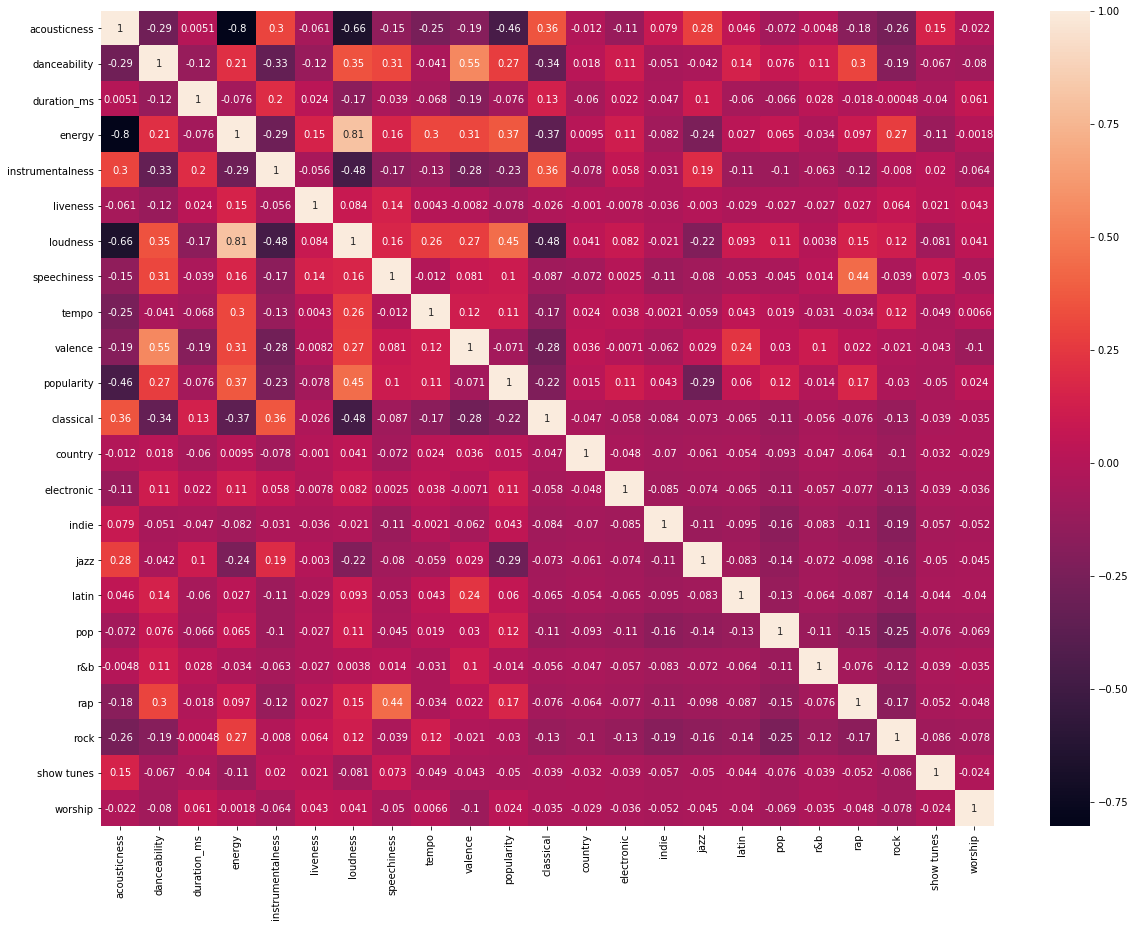

In [28]:
plt.figure(figsize=(20,15))
sn.heatmap(corrs,annot=True)

# Split Data into Training & Test Sets

In [29]:
data = new_df2[cols]
target = new_df2["clean_genres"]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target, test_size=0.2) #stratify for unequal target weights

# Scale

In [30]:
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
print(f"Training Rows: {len(y_train)}")
print(f"Testing Rows: {len(y_test)}")

Training Rows: 46185
Testing Rows: 11547


# Linear Regression: Logistic Model

Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

   classical       0.67      0.72      0.69       621
     country       0.00      0.00      0.00       439
  electronic       0.42      0.14      0.21       636
       indie       0.28      0.15      0.19      1264
        jazz       0.47      0.50      0.49       988
       latin       0.37      0.37      0.37       788
         pop       0.26      0.37      0.31      2060
         r&b       0.30      0.05      0.08       612
         rap       0.52      0.62      0.57      1077
        rock       0.47      0.69      0.55      2515
  show tunes       0.31      0.06      0.10       299
     worship       0.49      0.16      0.24       248

    accuracy                           0.41     11547
   macro avg       0.38      0.32      0.32     11547
weighted avg       0.39      0.41      0.38     11547


Confusion Matrix:
[[ 447    0    3   18   59    1   22    1    2   62    3    

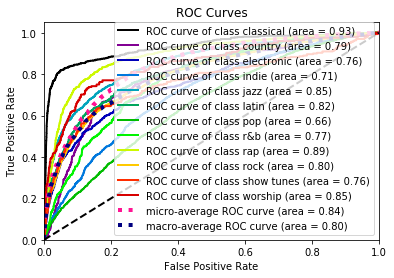

In [32]:
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [33]:
#   #SVM
# svm = SVC(kernel='linear', probability=True)
# svm.fit(X_train_scaled, y_train)
# preds = svm.predict(X_test_scaled) #predict
# proba_preds = svm.predict_proba(X_test_scaled) #predict

# print("SVM Analysis:")
# print("Classification Report:")
# print()
# print(classification_report(y_test, preds)) #evaluate
# print()
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, preds)) #evaluate

# #plot confusion matrix
# # fig, ax = plt.subplots(figsize=(5, 5))
# # plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# # plt.show()
# print()
# print("ROC Curve:")
# plot_roc(y_test, proba_preds) 
# plt.show()

# Ensemble/Tree Models

### Random Forest Classifier

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

   classical       0.80      0.80      0.80       621
     country       0.82      0.67      0.73       439
  electronic       0.50      0.44      0.46       636
       indie       0.44      0.41      0.43      1264
        jazz       0.66      0.66      0.66       988
       latin       0.68      0.71      0.70       788
         pop       0.44      0.44      0.44      2060
         r&b       0.41      0.41      0.41       612
         rap       0.63      0.70      0.66      1077
        rock       0.59      0.64      0.62      2515
  show tunes       0.70      0.57      0.63       299
     worship       0.84      0.79      0.82       248

    accuracy                           0.58     11547
   macro avg       0.63      0.60      0.61     11547
weighted avg       0.58      0.58      0.58     11547


Confusion Matrix:
[[ 494    1    4   15   11    3   49    1    2   35    6    0]
 [ 

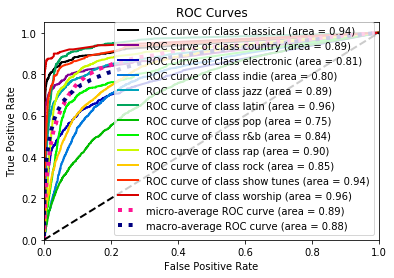

In [34]:
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

### XTREME Gradient Boosting Classifier

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

   classical       0.84      0.79      0.81       621
     country       0.74      0.60      0.66       439
  electronic       0.56      0.42      0.48       636
       indie       0.44      0.38      0.41      1264
        jazz       0.66      0.64      0.65       988
       latin       0.67      0.68      0.67       788
         pop       0.43      0.44      0.44      2060
         r&b       0.41      0.38      0.40       612
         rap       0.62      0.70      0.66      1077
        rock       0.58      0.67      0.62      2515
  show tunes       0.65      0.54      0.59       299
     worship       0.88      0.79      0.83       248

    accuracy                           0.57     11547
   macro avg       0.62      0.59      0.60     11547
weighted avg       0.57      0.57      0.57     11547


Confusion Matrix:
[[ 490    1    4   19   14    1   40    2    3   38   

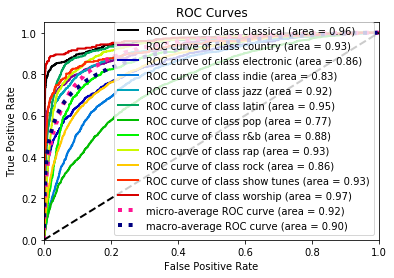

In [35]:
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()